In [96]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('transactions_dataset.csv')

In [6]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [534]:
del data['Unnamed: 0']

In [536]:
data.head(20)

,order_id,customer_id,order_date,is_canceled,number_of_paid_orders_before,date_minus_time
0,0,52285,2016-01-01 00:09:51,0,1,2016-01-01 00:00:00
1,1,58296,2016-01-01 14:36:14,0,0,2016-01-01 14:00:00
2,2,30609,2016-01-01 14:47:46,0,2,2016-01-01 14:00:00
3,3,30256,2016-01-01 15:06:36,0,2,2016-01-01 15:00:00
4,4,52642,2016-01-01 16:27:37,0,5,2016-01-01 16:00:00
5,5,56257,2016-01-01 17:14:02,0,5,2016-01-01 17:00:00
6,6,9948,2016-01-01 18:45:36,0,176,2016-01-01 18:00:00
7,7,39536,2016-01-01 19:17:55,0,11,2016-01-01 19:00:00
8,8,26729,2016-01-01 19:47:50,1,72,2016-01-01 19:00:00
9,9,26729,2016-01-01 20:01:01,1,73,2016-01-01 20:00:00


In [15]:
data['date_minus_time'] = data["order_date"].apply( lambda df : 
                                datetime.datetime(year=df.year, month=df.month, day=df.day, hour=df.hour))

In [382]:
data.groupby(data['date_minus_time'].dt.month)['order_id'].count()

date_minus_time
1    1476
2    2155
3    2369
4    3920
5    3450
6    2684
Name: order_id, dtype: int64

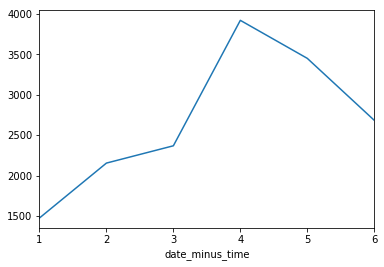

In [383]:
data.groupby(data['date_minus_time'].dt.month)['order_id'].count().plot()

##  sales grow from 1 month with trend to continue

In [384]:
data.groupby(data['date_minus_time'].dt.hour)['order_id'].count()

date_minus_time
0      868
1      987
2     1045
3      913
4      808
5      643
6      410
7      308
8      279
9      186
10     213
11     268
12     311
13     462
14     595
15     746
16     744
17     831
18     872
19     879
20     896
21     909
22     941
23     940
Name: order_id, dtype: int64

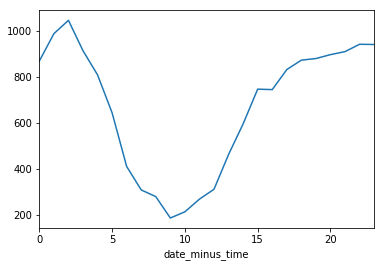

In [385]:
data.groupby(data['date_minus_time'].dt.hour)['order_id'].count().plot()

### we see several peacks and deep drop of the seals 

In [386]:
data.groupby(data['date_minus_time'].dt.week)['order_id'].count()

date_minus_time
1      264
2      295
3      440
4      421
5      499
6      472
7      545
8      557
9      486
10     526
11     534
12     533
13     608
14     776
15     889
16    1096
17    1076
18     952
19     803
20     720
21     629
22     694
23     725
24     582
25     546
26     330
53      56
Name: order_id, dtype: int64

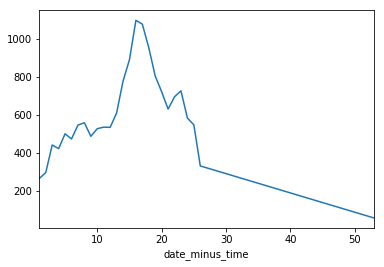

In [387]:
data.groupby(data['date_minus_time'].dt.week)['order_id'].count().plot()

# After peak at fist week and drop mean sales relatively stable

In [388]:
new = data[['date_minus_time','number_of_paid_orders_before']]

In [389]:
new = new.set_index('date_minus_time')

In [390]:
df = pd.DataFrame({'data': data['number_of_paid_orders_before']}, index=data['date_minus_time'])

In [396]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(new.number_of_paid_orders_before.values, freq=180, model='additive')

print(result.seasonal)
print(result.observed)

[ 0.99729145 -2.1034977   0.28513867 ... -3.2908083  -0.74589037
 -0.71650275]
[1 0 2 ... 3 6 2]


<Figure size 1440x1440 with 0 Axes>

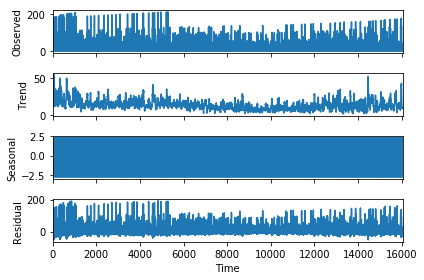

In [395]:
plt.figure(figsize=(20, 20))
result.plot()
plt.show()

#### There is strong trend in the begging of the sales in 6 month period time. Not observed anything in 30 days period


###     2.1. calculate cancel_rate for the whole dataset. What about standard error, confidence intervalsm

In [397]:
data.is_canceled.mean() # mean cansel rate of whole data

0.07101034010215522

In [398]:
se_ = np.std (data.is_canceled)/ np.sqrt(len(data))

mean_ = data.is_canceled.mean()

t_score = st.t.ppf(1-0.05/2, len(data) - 1)

lower_t = mean_ - t_score * se_
upper_t = mean_ + t_score * se_

print('confidence interval of the mean is from {} to {} \n standart error {}'.format(lower_t, upper_t, se_))

confidence interval of the mean is from 0.06703700271067727 to 0.07498367749363317 
 standart error 0.0020270973555418684


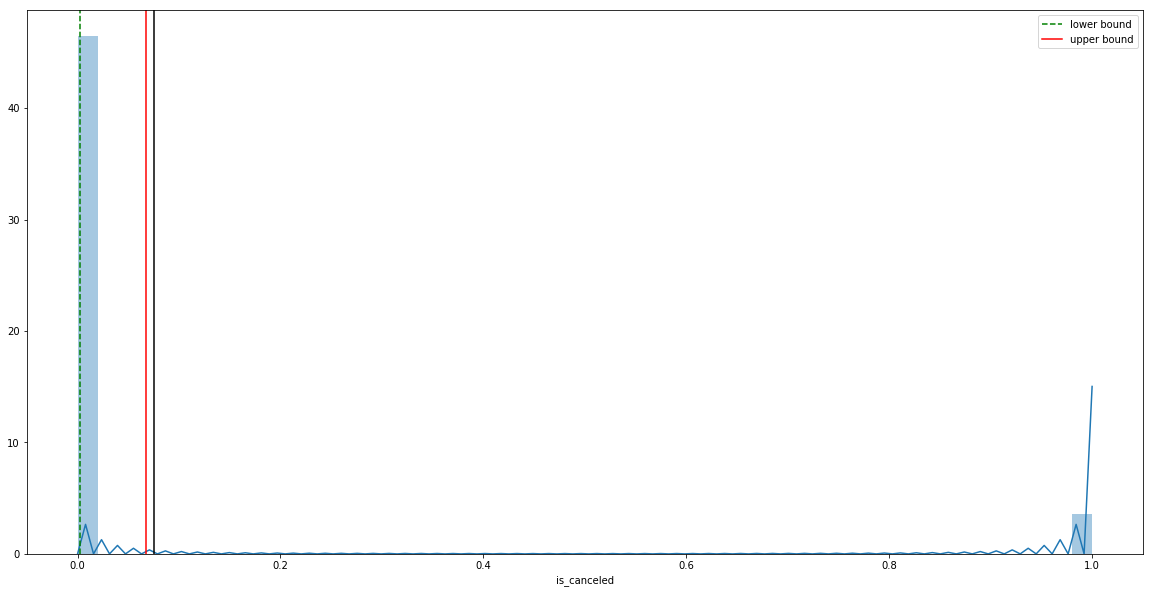

In [399]:
plt.figure(figsize=(20, 10))
sns.distplot(data.is_canceled)
plt.axvline(se_, color='green', linestyle='--')
plt.axvline(lower_t, color='red')
plt.axvline(upper_t, color='black')
plt.legend(['lower bound', 'upper bound'])
plt.show()

 # investigate cancel_rate vs number_of_paid_orders_before (number_of_paid_orders_before altering in [0:10] range) – any ideaswhy dependency looks so? What about standard error?

In [400]:
data_f = data[data['number_of_paid_orders_before'] < 10]
data_f.is_canceled.mean() # cansel rates for customers that buy less than 10 times

0.08535606820461385

In [401]:
data_f.head()

,Unnamed: 0,order_id,customer_id,order_date,is_canceled,number_of_paid_orders_before,date_minus_time
0,0,0,52285,2016-01-01 00:09:51,0,1,2016-01-01 00:00:00
1,1,1,58296,2016-01-01 14:36:14,0,0,2016-01-01 14:00:00
2,2,2,30609,2016-01-01 14:47:46,0,2,2016-01-01 14:00:00
3,3,3,30256,2016-01-01 15:06:36,0,2,2016-01-01 15:00:00
4,4,4,52642,2016-01-01 16:27:37,0,5,2016-01-01 16:00:00


In [413]:
me = data_f.groupby('number_of_paid_orders_before')['is_canceled'].mean()

In [422]:
mean_n = []
count_n = []
std_error = []
mean_cr = np.mean(me)
alpha = 0.05
t_score = st.t.ppf(1-alpha/2, 9)

lower = []
upper = []


for i in range(0, 10):
    df_temp = data_f[data_f['number_of_paid_orders_before'] == i]
    mean_n.append(df_temp.is_canceled.mean())
    count_n.append(len(df_temp))
    std_error.append(df_temp.is_canceled.std()/np.sqrt(len(df_temp)))

low = np.array(mean_n) - t_score * np.array(std_error)
upp = np.array(mean_n) + t_score * np.array(std_error)

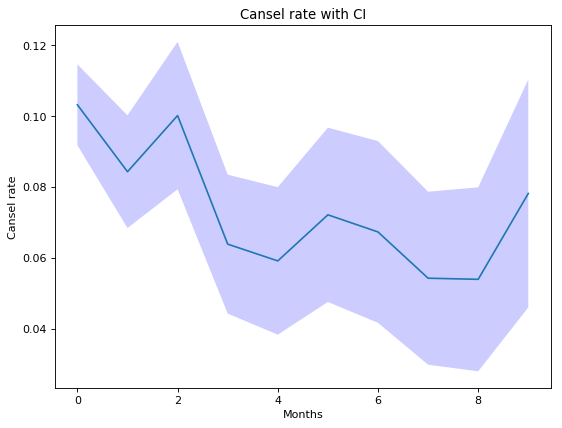

In [432]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='r')    
plt.plot(me)
plt.title('Cansel rate with CI')
plt.xlabel('Months')
plt.ylabel('Cansel rate')
plt.fill_between(range(0,10), low, upp, edgecolor='none', facecolor='b', alpha=0.2, interpolate=True)

#### Cancel rate in month period

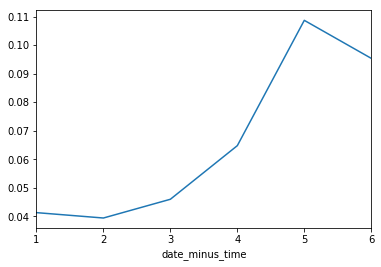

In [239]:
data.groupby(data['date_minus_time'].dt.month)['is_canceled'].mean().plot()

### Investigate time between customer's placed orders– dT (how often does the customer place orders)

In [257]:
data.head()

,Unnamed: 0,order_id,customer_id,order_date,is_canceled,number_of_paid_orders_before,date_minus_time
0,0,0,52285,2016-01-01 00:09:51,0,1,2016-01-01 00:00:00
1,1,1,58296,2016-01-01 14:36:14,0,0,2016-01-01 14:00:00
2,2,2,30609,2016-01-01 14:47:46,0,2,2016-01-01 14:00:00
3,3,3,30256,2016-01-01 15:06:36,0,2,2016-01-01 15:00:00
4,4,4,52642,2016-01-01 16:27:37,0,5,2016-01-01 16:00:00


In [433]:
data.groupby('customer_id')['order_id'].count().head()

customer_id
7939    30
7978     1
8057     1
8088     1
8105     3
Name: order_id, dtype: int64

In [675]:
# df_cst = data[data.customer_id == 7939].copy()
# df_cst['time_next'] = df_cst.order_date.diff().shift(-1)

df = data.sort_values('order_date')

df['time_next'] = df.groupby('customer_id').order_date.transform(lambda x: x.diff().shift(-1))

In [674]:
df.fillna(0, inplace=True)

/home/volodymyr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [495]:
df = df[df['time_next'] != '0 days 00:00:00']

In [676]:
df.time_next.dt.days.mean() # mean of the day

8.974661544090743

/home/volodymyr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/volodymyr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


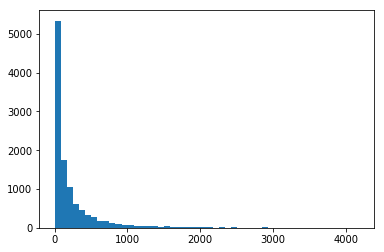

In [677]:
plt.hist(df.time_next.dt.total_seconds() / 3600, bins=50)
plt.show()

Text(0.5, 0, 'orders')

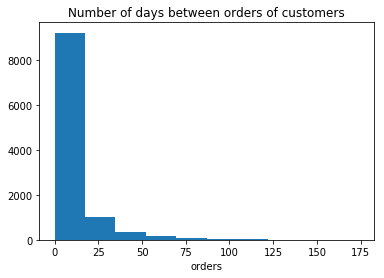

In [678]:
plt.hist(df.time_next.dt.days)
plt.title('Number of days between orders of customers')
plt.xlabel('orders')

In [679]:
df.time_next.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9])

0.1           0 days 00:13:08
0.2    0 days 00:47:39.600000
0.3    0 days 18:46:29.599999
0.4           1 days 23:29:49
0.5           3 days 19:13:58
0.6    6 days 00:01:54.799999
0.7    8 days 09:22:18.599999
0.9   25 days 01:48:24.099999
Name: time_next, dtype: timedelta64[ns]

In [680]:
del df['date_minus_time']

In [681]:
df.sort_values('time_next', inplace=True)

In [682]:
customers_days = df.groupby('customer_id')['time_next'].sum().sort_values(ascending=False)

In [683]:
customers_days.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9])

0.1           0 days 00:00:00
0.2           0 days 00:00:00
0.3           0 days 00:00:00
0.4           0 days 00:00:00
0.5           0 days 00:00:00
0.6    0 days 17:37:01.999999
0.7   10 days 21:08:32.300000
0.9   80 days 05:15:55.800000
Name: time_next, dtype: timedelta64[ns]

#### 3.2. compare retention time period for FCO (1st customer’s order) vs not FCO (2nd customer’s order and more)

In [684]:
df.groupby('time_next')['customer_id'].value_counts().sort_values(ascending=False).head()

time_next  customer_id
00:05:34   51721          2
00:01:48   22814          2
00:03:07   22814          2
00:06:02   52363          2
00:06:24   33853          2
Name: customer_id, dtype: int64

In [685]:
import datetime
dt_mult = datetime.timedelta(hours=1)
dt_mult

datetime.timedelta(seconds=3600)

In [686]:
(dt_mult > df.time_next).mean()

0.14239441883642706

In [687]:
from scipy.stats import ttest_ind

In [688]:
data1 = df[df.number_of_paid_orders_before == 0].time_next.astype(int)
data2 = df[df.number_of_paid_orders_before == 1].time_next.astype(int)

ttest_ind(data1, data2, nan_policy='omit')

Ttest_indResult(statistic=-12.29627750876382, pvalue=2.8304097694236053e-34)

In [689]:
df.head()

,order_id,customer_id,order_date,is_canceled,number_of_paid_orders_before,time_next
852,852,35435,2016-01-21 15:05:29,0,13,00:00:04
851,851,35435,2016-01-21 15:05:23,0,12,00:00:06
8348,8348,45004,2016-04-20 12:35:50,0,108,00:00:13
5883,5883,61188,2016-03-30 21:00:39,0,25,00:00:20
5884,5884,61188,2016-03-30 21:00:59,0,26,00:00:20


In [690]:
df[df.number_of_paid_orders_before == 0].time_next.mean() # People who buy first comes after 12 days

Timedelta('9 days 20:18:00.540519')

In [691]:
df[df.number_of_paid_orders_before <= 2].time_next.mean() #  After 11 days they buy second item

Timedelta('11 days 03:20:47.345294')

#### 3.3. investigate what is the fraction of ‘multi-orders’ for which the time between two sequential orders < dT_multi, and it is short enough to consider two orders to be placed simultaneously. What dT_multi would would you choose and why?    T

In [692]:
df = df.set_index('order_date')

In [693]:
df['dT_multi'] = df.time_next.transform(lambda x: x.diff().shift(-1))

In [694]:
df.head()

,order_id,customer_id,is_canceled,number_of_paid_orders_before,time_next,dT_multi
order_date,,,,,,
2016-01-21 15:05:29,852,35435,0,13,00:00:04,00:00:02
2016-01-21 15:05:23,851,35435,0,12,00:00:06,00:00:07
2016-04-20 12:35:50,8348,45004,0,108,00:00:13,00:00:07
2016-03-30 21:00:39,5883,61188,0,25,00:00:20,00:00:00
2016-03-30 21:00:59,5884,61188,0,26,00:00:20,00:00:02


Text(0, 0.5, '# hours')

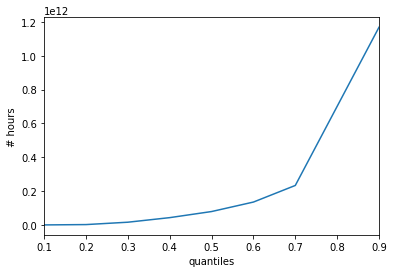

In [695]:
df['dT_multi'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]).plot()
plt.xlabel('quantiles')
plt.ylabel('# hours')

### We can count 0.2 sec as time after we may consider a not simultanious order

4. Investigate customer retention_rate: % of customers who return after completing an order

In [698]:
len(df[df.number_of_paid_orders_before == 0]) / len(df[df.number_of_paid_orders_before > 0])

0.2924885274937606

In [699]:
df.reset_index(inplace=True)

In [700]:
dt_loss = datetime.timedelta(days=30)

In [701]:
df['returned_after'] = 0

In [702]:
df.loc[df.time_next < dt_loss, 'returned_after'] = 1

In [705]:
df.returned_after.mean()

0.6282546405880155

In [713]:
mask = (df.is_canceled == 1)

_, pvalue = ttest_ind(df[mask].returned_after, df[~mask].returned_after, nan_policy='omit')

pvalue /=2

print(pvalue) # less than 0.05 - so it is stat sagnificant

0.047805794663911653


In [714]:
df[mask].returned_after.mean(), df[~mask].returned_after.mean() # мі проверяем 

(0.6052631578947368, 0.6300120691967279)

In [715]:
mask_1 = (df.number_of_paid_orders_before <= 1)

In [ ]:
df[mask_1 & mask]

In [720]:
(df[mask].time_next < dt_mult).mean() # проверяем причины возврата товара и возможной новой покупки 

0.13157894736842105

In [717]:
(df[~mask].time_next < dt_mult).mean()

0.14322113450449242

In [721]:
df[mask].time_next.median()

Timedelta('1 days 12:37:07')

In [722]:
df[~mask].time_next.median()

Timedelta('3 days 23:29:22.500000')